In [1184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

### Read Data

In [1185]:
data=pd.read_csv("E:\MachinelearningCampus\Breast_Cancer_Detection\data\data.csv") #Do đang sử dụng local nên nhớ thay đổi lại đường dẫn

In [1186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1187]:
data.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [1189]:
for feature in data.columns:
    print({feature: data[feature].nunique()})

{'id': 569}
{'diagnosis': 2}
{'radius_mean': 456}
{'texture_mean': 479}
{'perimeter_mean': 522}
{'area_mean': 539}
{'smoothness_mean': 474}
{'compactness_mean': 537}
{'concavity_mean': 537}
{'concave points_mean': 542}
{'symmetry_mean': 432}
{'fractal_dimension_mean': 499}
{'radius_se': 540}
{'texture_se': 519}
{'perimeter_se': 533}
{'area_se': 528}
{'smoothness_se': 547}
{'compactness_se': 541}
{'concavity_se': 533}
{'concave points_se': 507}
{'symmetry_se': 498}
{'fractal_dimension_se': 545}
{'radius_worst': 457}
{'texture_worst': 511}
{'perimeter_worst': 514}
{'area_worst': 544}
{'smoothness_worst': 411}
{'compactness_worst': 529}
{'concavity_worst': 539}
{'concave points_worst': 492}
{'symmetry_worst': 500}
{'fractal_dimension_worst': 535}
{'Unnamed: 32': 0}


### Data Cleaning

In [1190]:
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [1191]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [1192]:
data.duplicated().any()

False

In [1193]:
# Kiểm tra data có bị lặp
data.isna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1194]:
# Xóa các dòng bị lập
data.drop_duplicates()
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [1196]:
# đếm sô lượng outlier
def count_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return len(outliers)

In [1197]:
for col in data.select_dtypes(include=np.number).columns:
    print("{:<25} {:>6}".format(col, count_outliers(data, col)))

diagnosis                      0
radius_mean                   14
texture_mean                   7
perimeter_mean                13
area_mean                     25
smoothness_mean                6
compactness_mean              16
concavity_mean                18
concave points_mean           10
symmetry_mean                 15
fractal_dimension_mean        15
radius_se                     38
texture_se                    20
perimeter_se                  38
area_se                       65
smoothness_se                 30
compactness_se                28
concavity_se                  22
concave points_se             19
symmetry_se                   27
fractal_dimension_se          28
radius_worst                  17
texture_worst                  5
perimeter_worst               15
area_worst                    35
smoothness_worst               7
compactness_worst             16
concavity_worst               12
concave points_worst           0
symmetry_worst                23
fractal_di

In [1198]:
sns.set(style="whitegrid")
colors=['#606676', '#CDC2A5']

palette={'0': colors[0], '1': colors[1]}

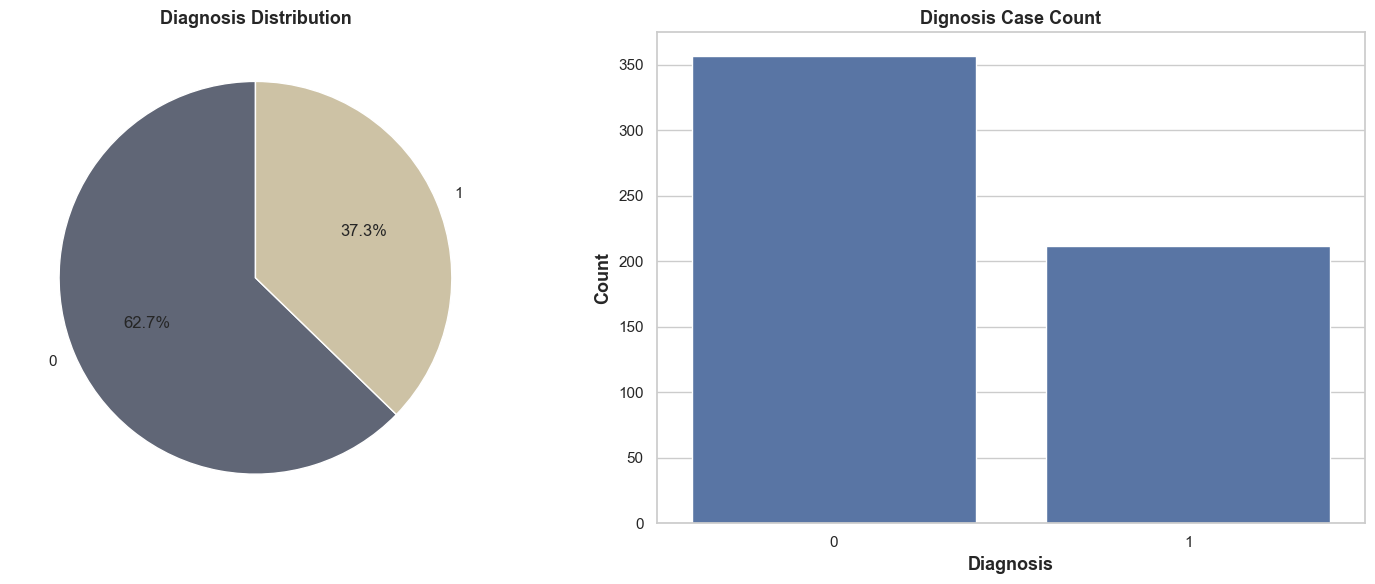

In [1199]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(data['diagnosis'].value_counts(), labels=data['diagnosis'].value_counts().index,
           autopct='%1.1f%%',startangle=90, colors=colors)
axs[0].set_title('Diagnosis Distribution', fontsize = 13, fontweight = 'bold')


sns.countplot(x='diagnosis', data=data, ax=axs[1])
axs[1].set_title('Dignosis Case Count', fontsize = 13, fontweight = 'bold')
axs[1].set_xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
axs[1].set_ylabel('Count', fontsize = 13, fontweight = 'bold')

plt.tight_layout()
plt.show()

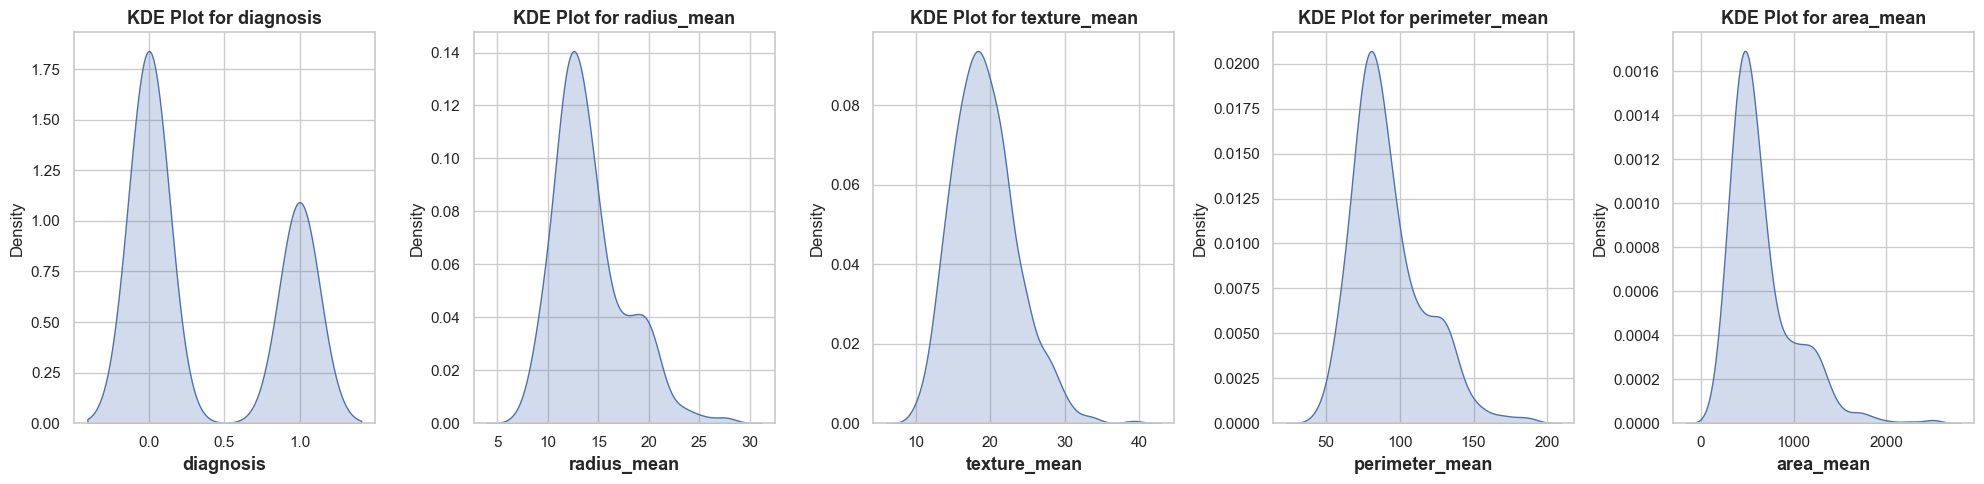

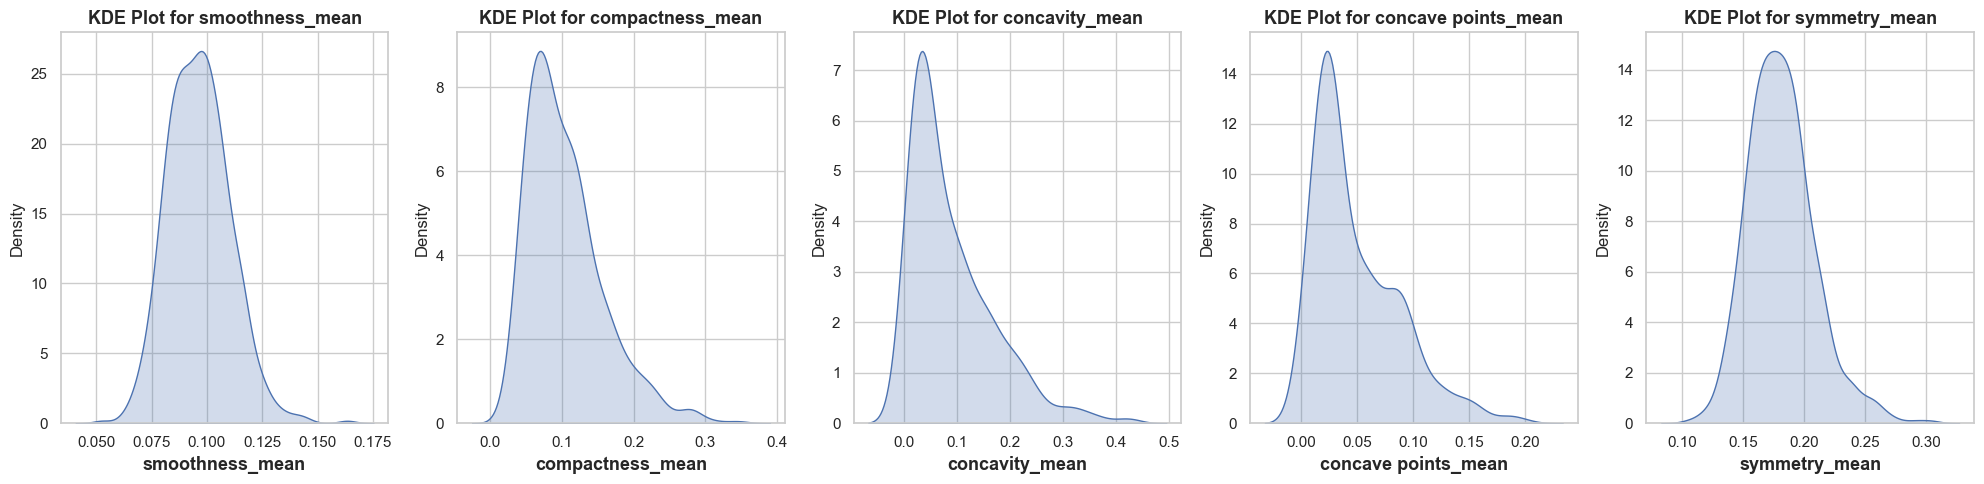

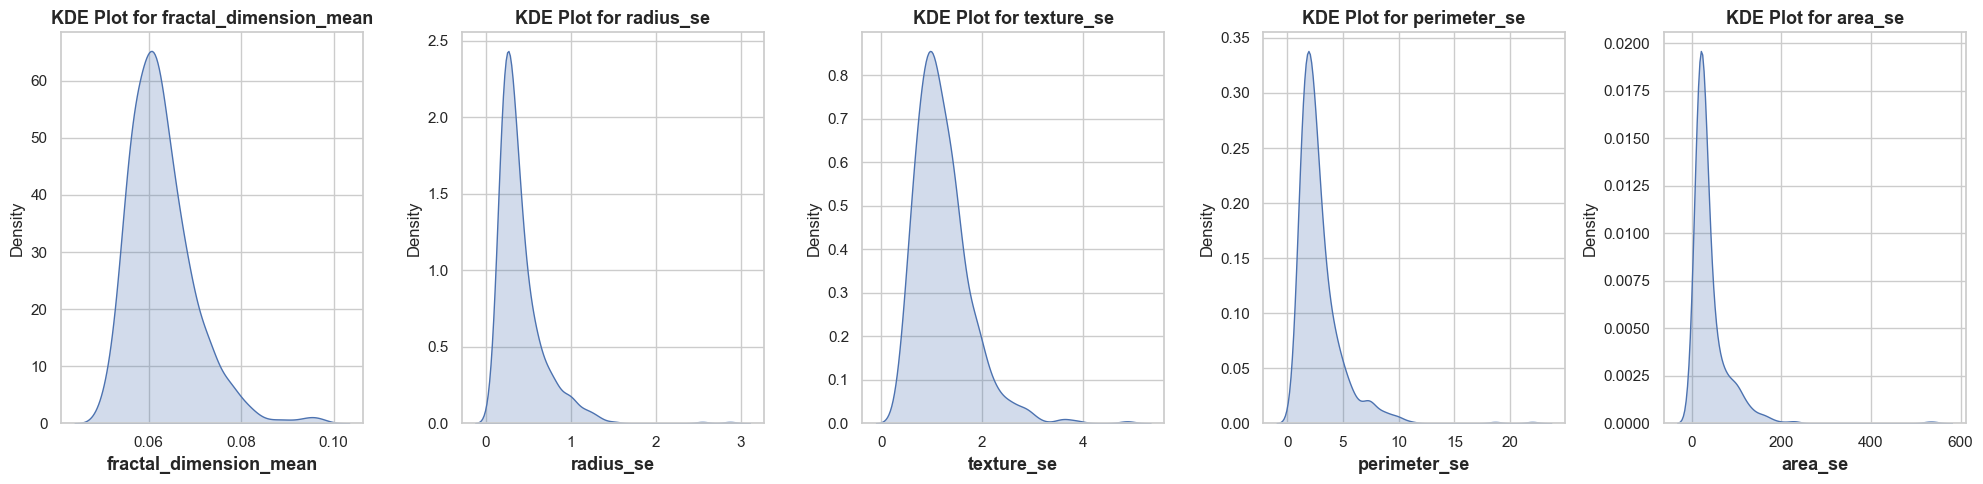

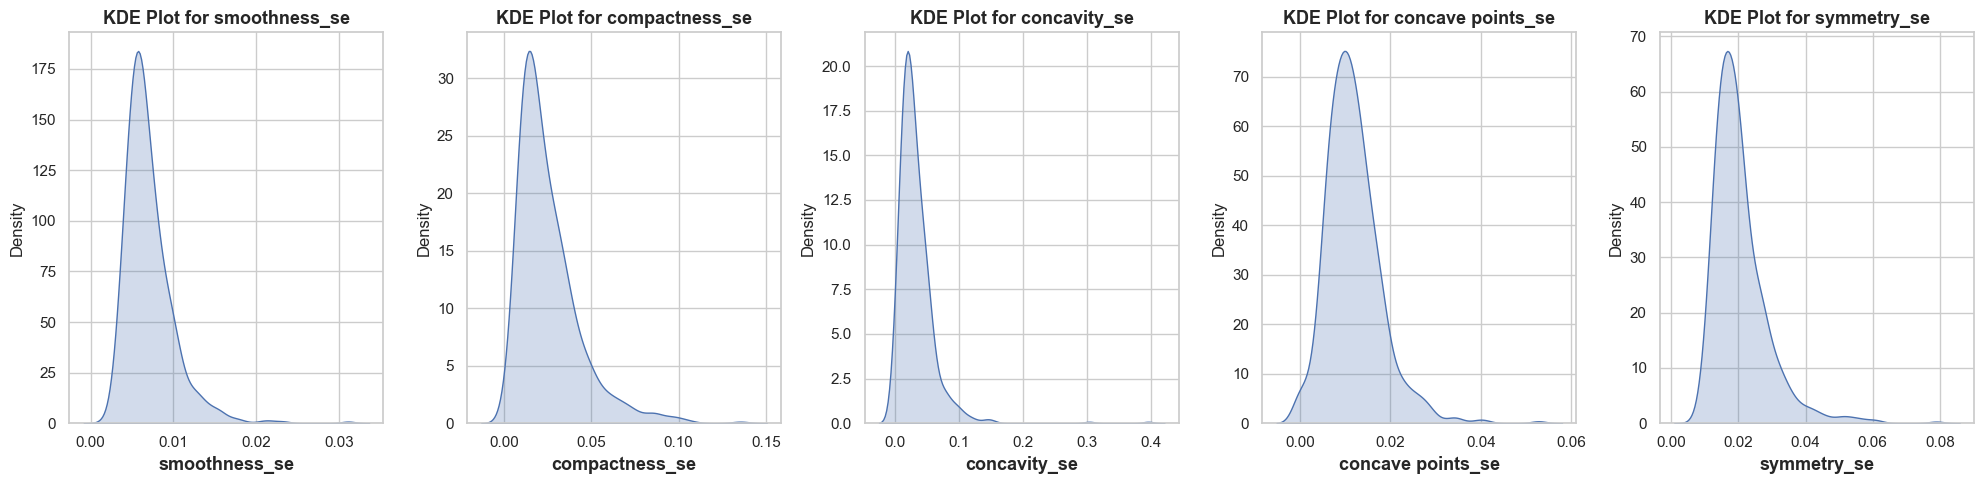

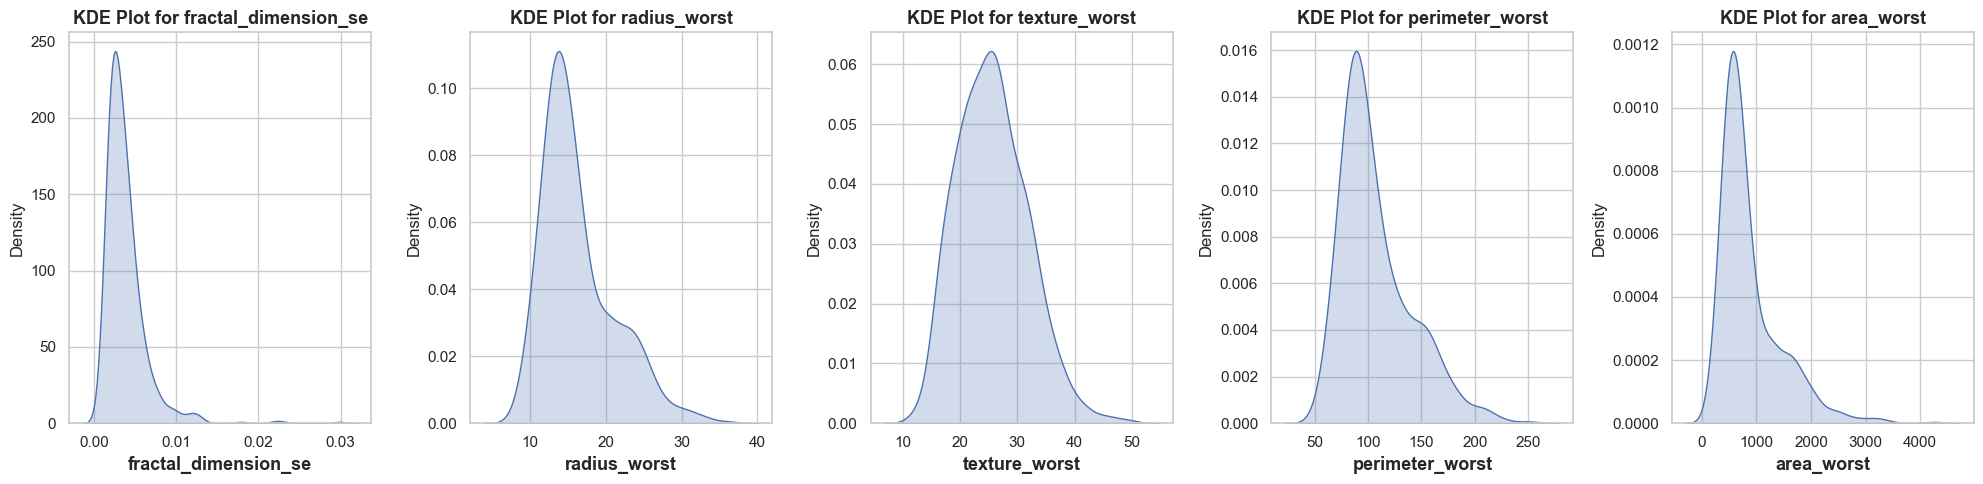

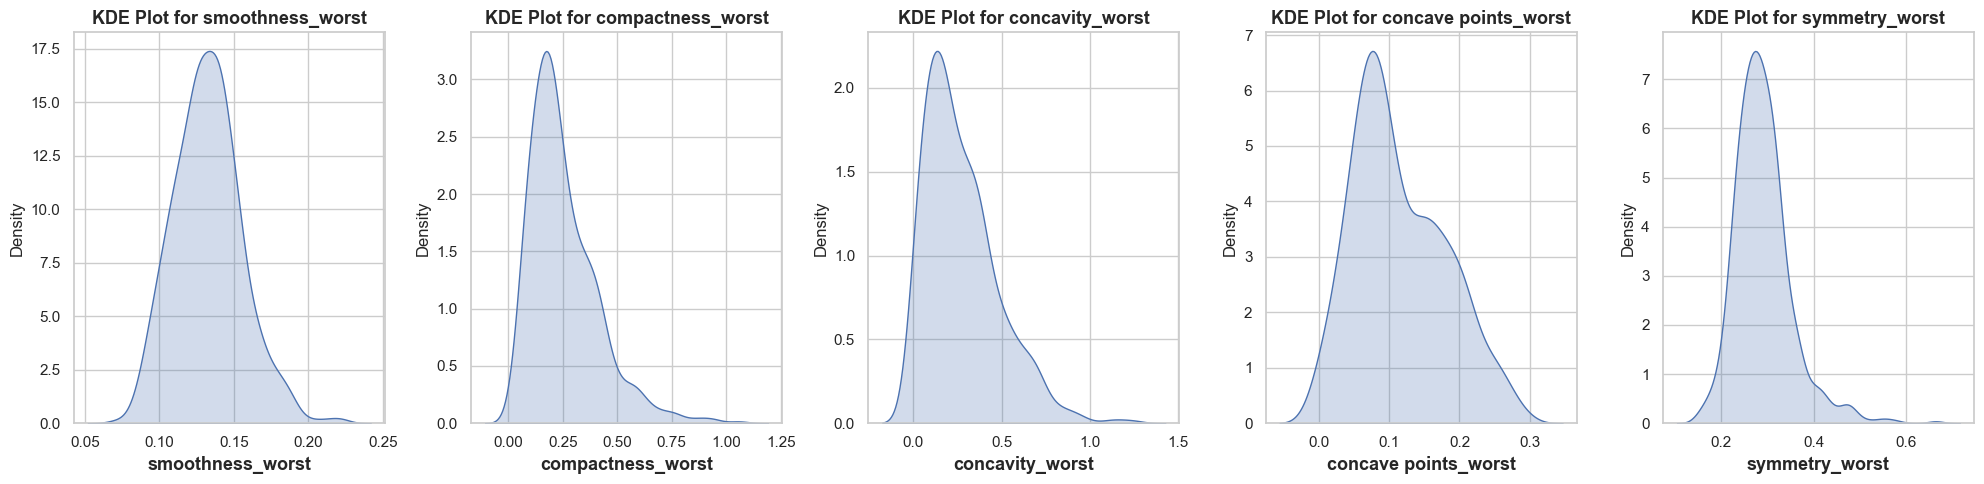

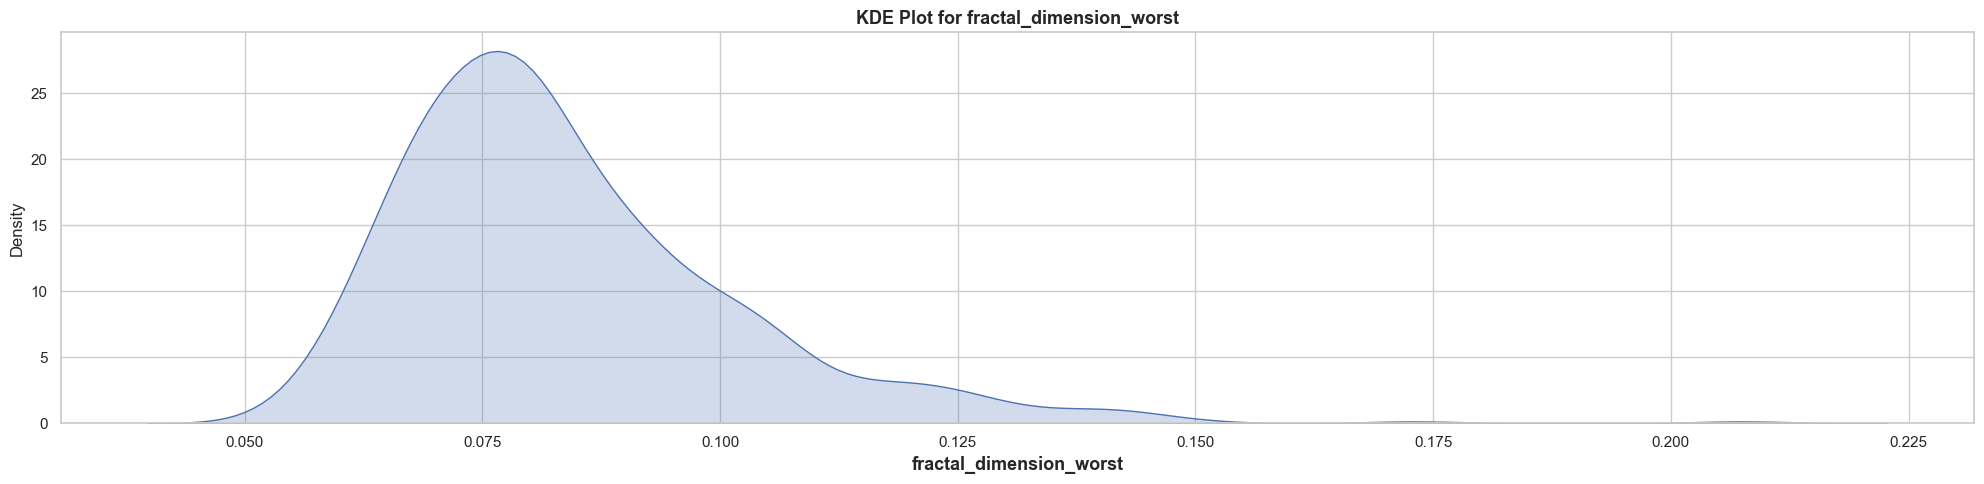

In [1200]:
features = data.select_dtypes(exclude=['object'])

num_cols_groups = [features.columns[i:i+5] for i in range(0, len(features.columns), 5)]

for cols_group in num_cols_groups:
    fig, axs = plt.subplots(1, len(cols_group), figsize=(20, 5))

    if len(cols_group) == 1:
        axs = [axs]
    for i, col in enumerate(cols_group):
        sns.kdeplot(data[col], ax=axs[i], fill = True)
        axs[i].set_title(f'KDE Plot for {col}', fontsize = 13, fontweight = 'bold')
        axs[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')

    plt.tight_layout()
    plt.show()

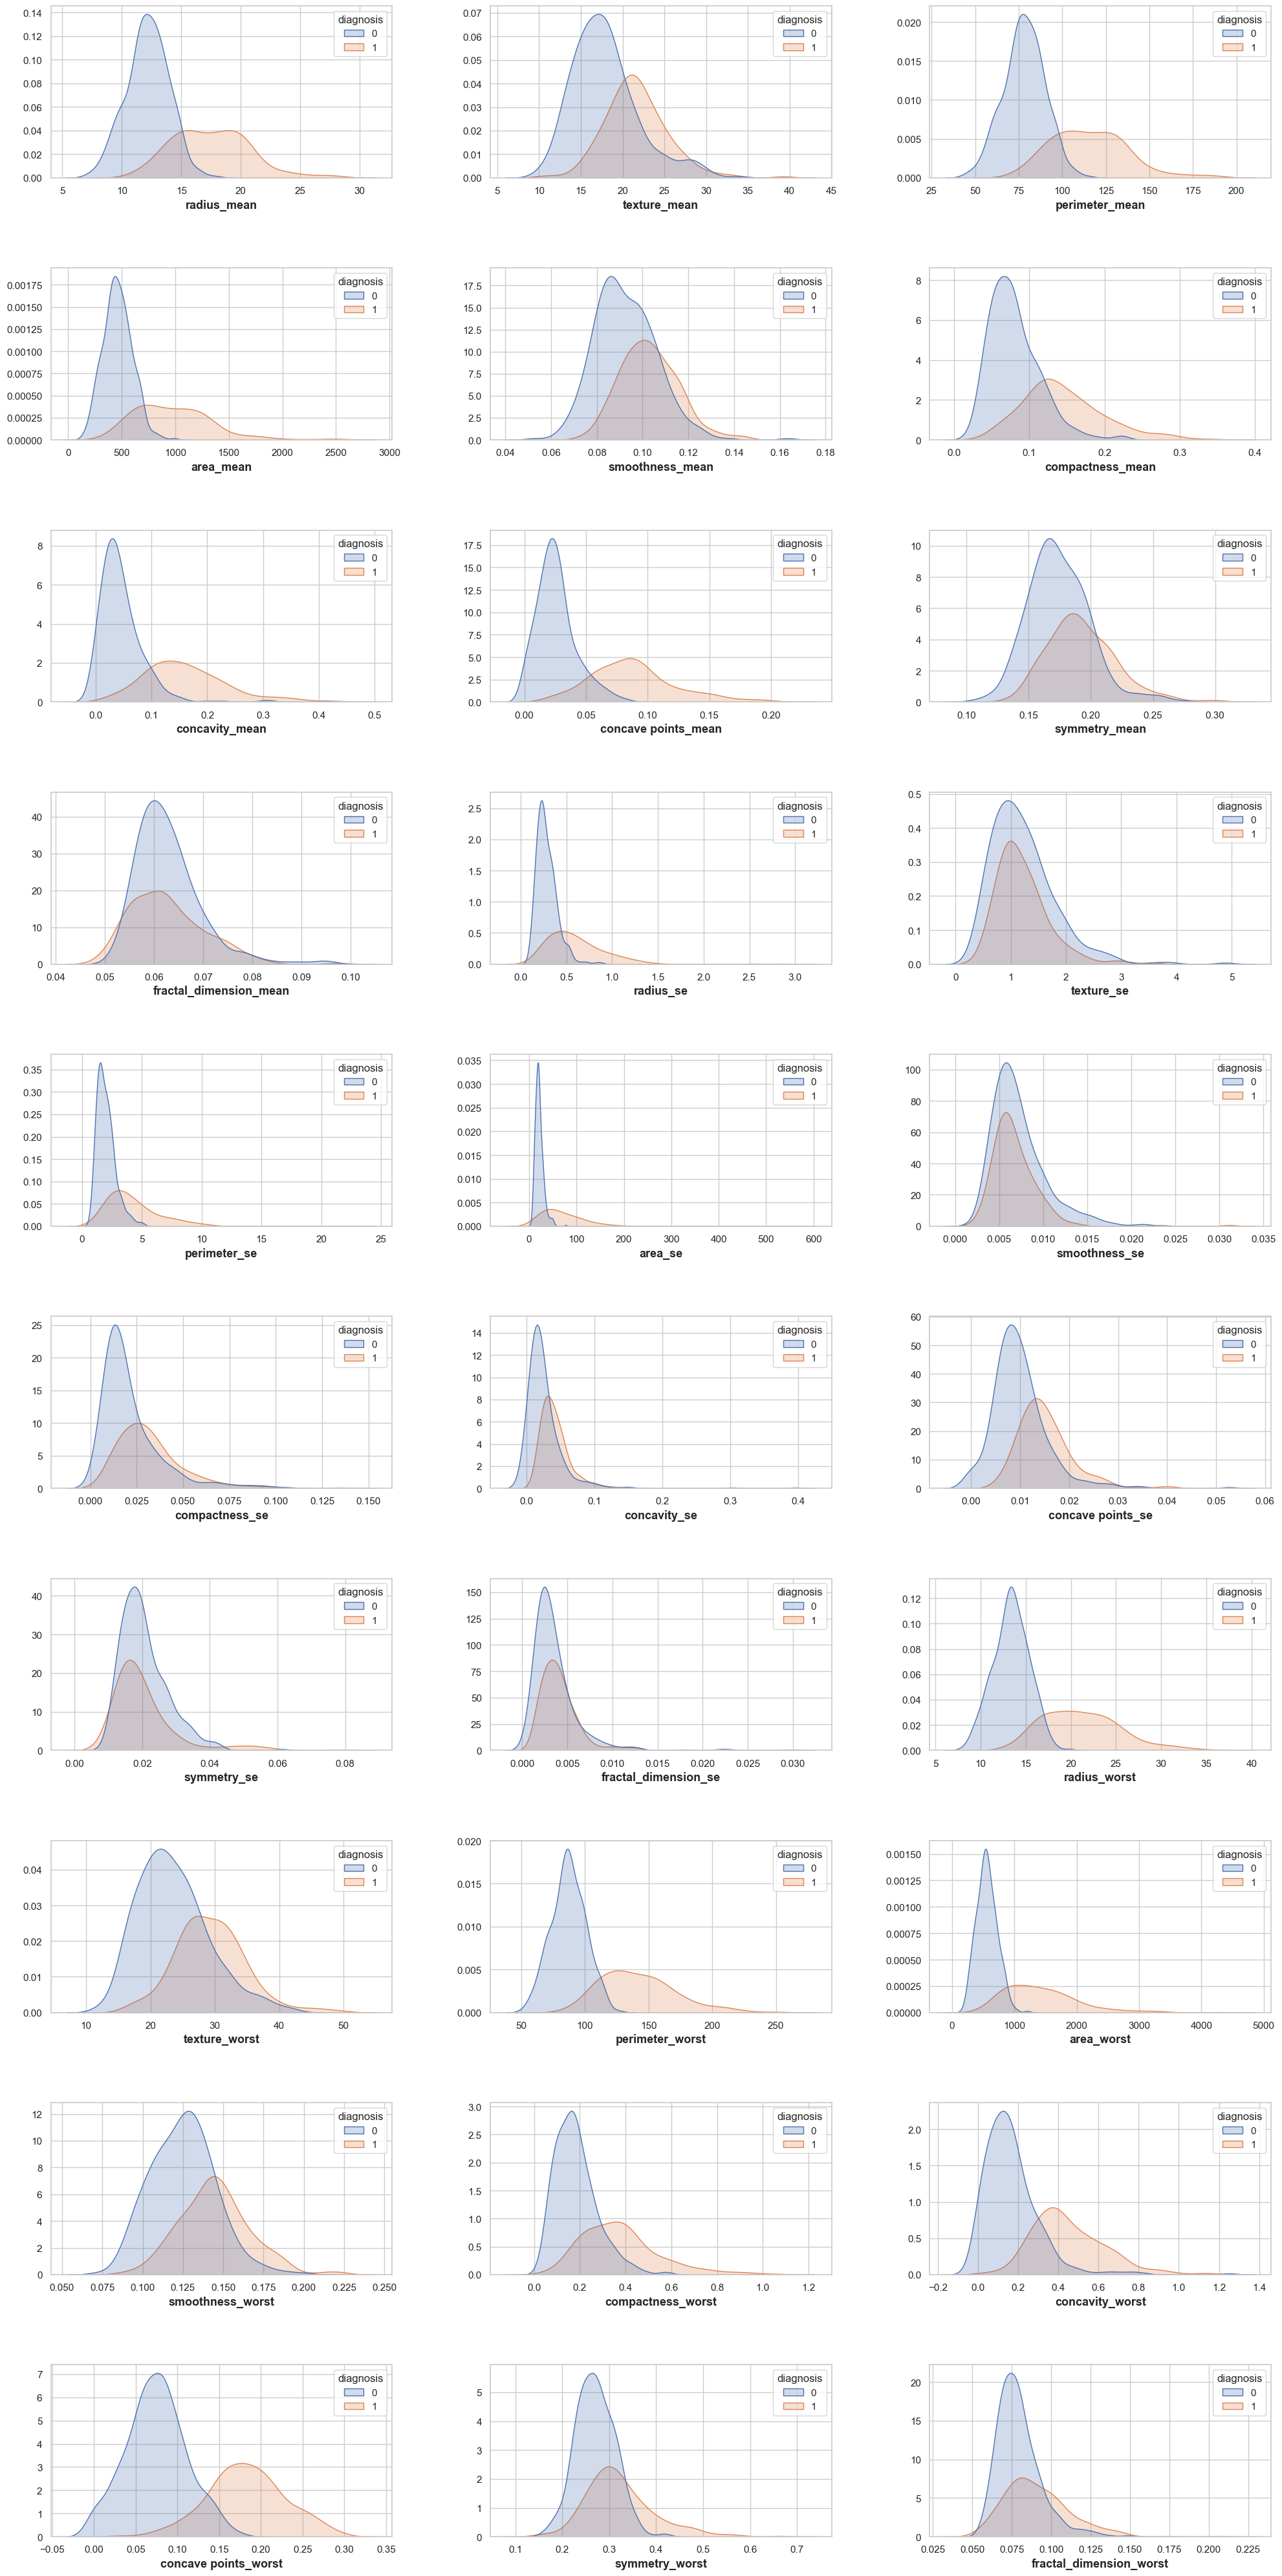

In [1201]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:]):
    sns.kdeplot(x=col, data=data, ax=ax[i], fill=True, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

In [1203]:
data.select_dtypes(include='number')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


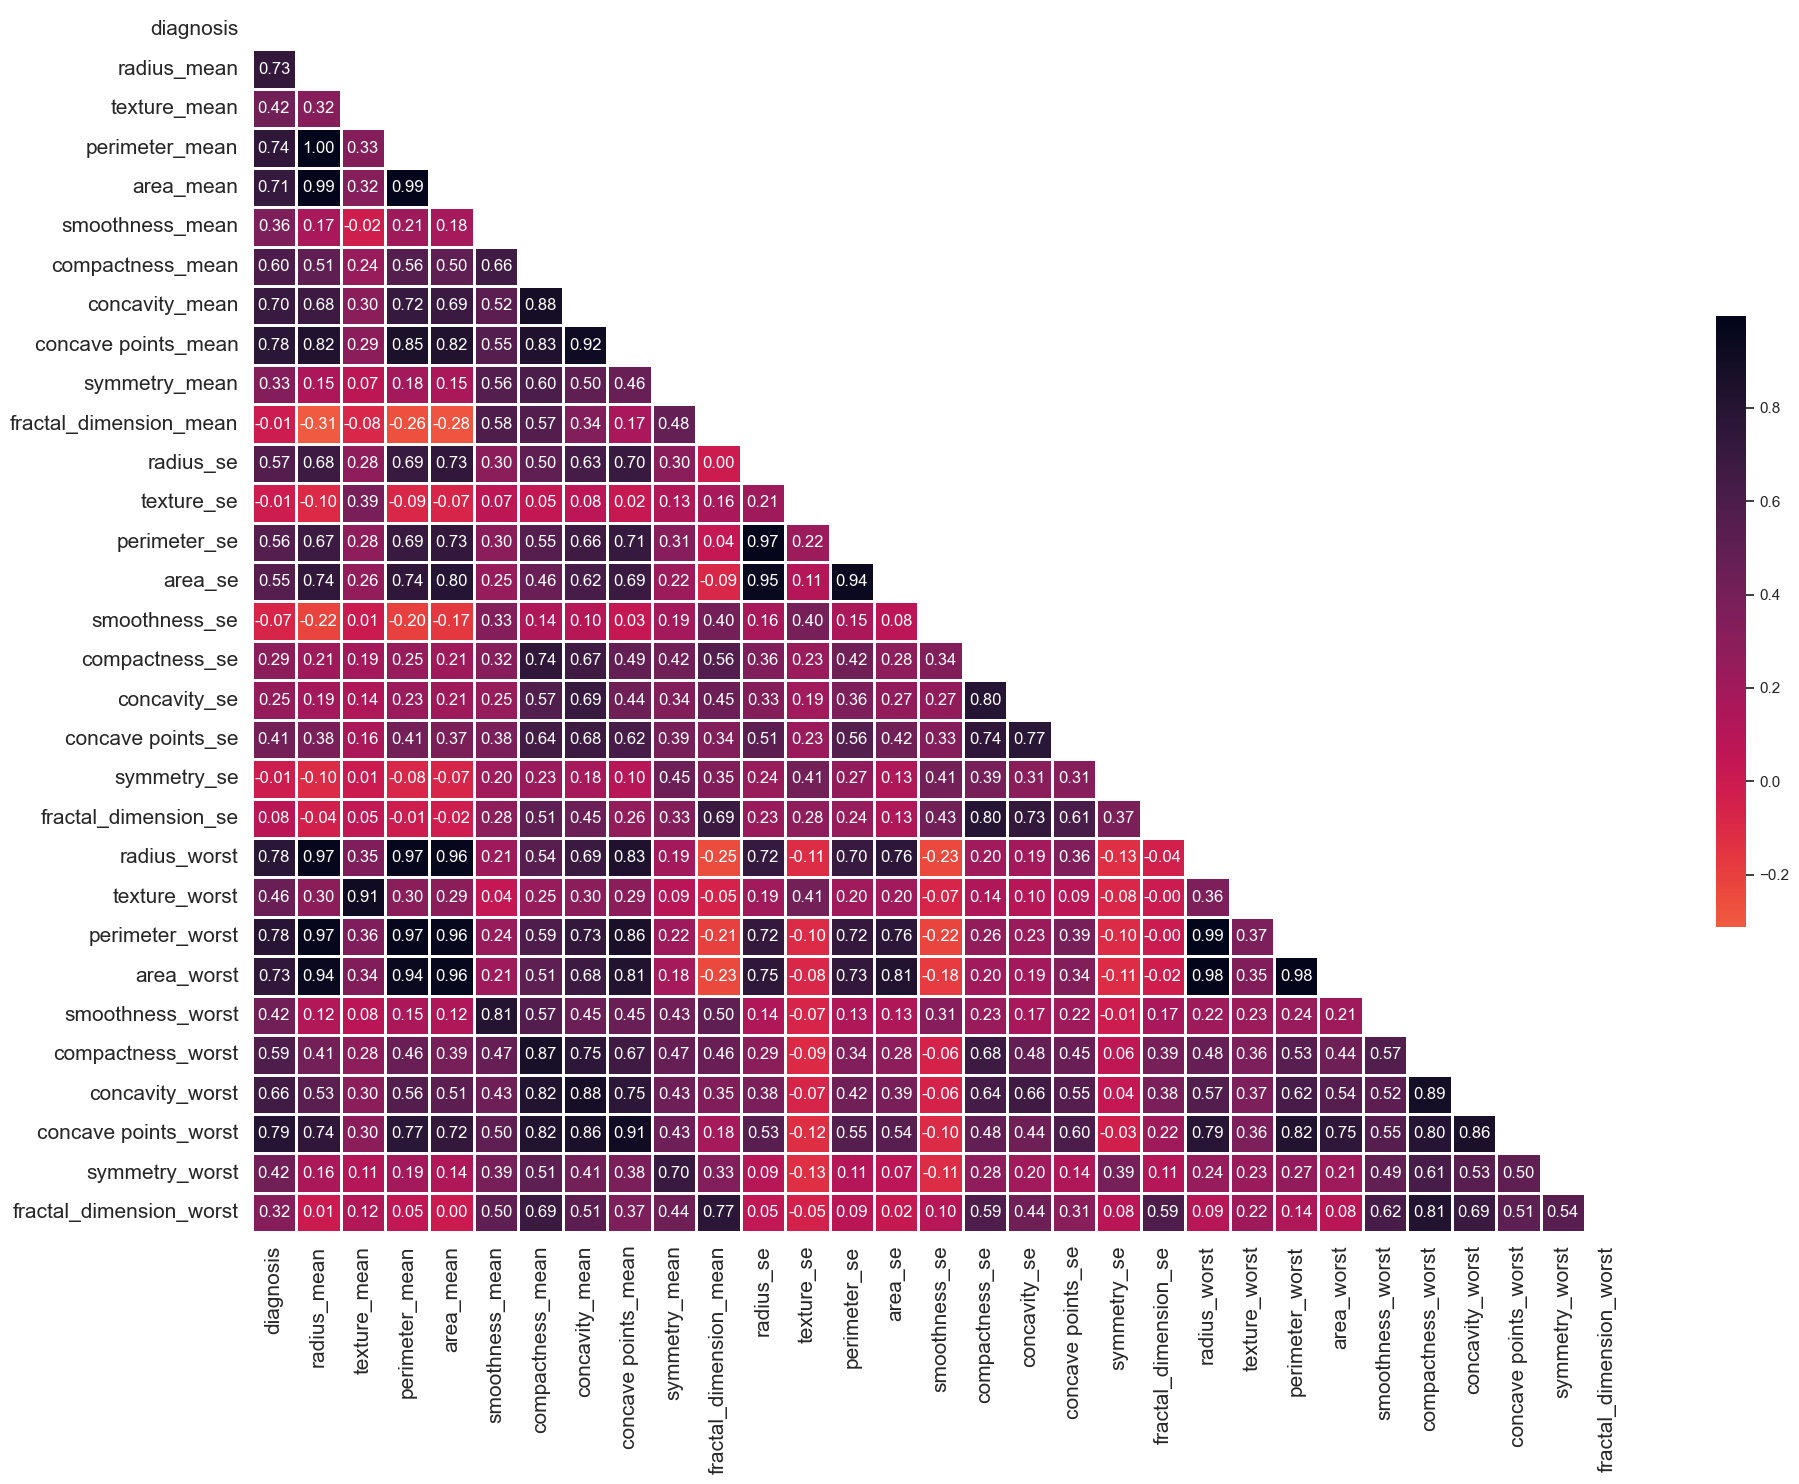

In [1204]:
sns.set_theme(style="white")

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(data.select_dtypes(include="number").corr(), dtype=bool))
ax = sns.heatmap(data.select_dtypes(include="number").corr(), annot=True, cmap='rocket_r', fmt='.2f',
            linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)

plt.tight_layout()
plt.show()

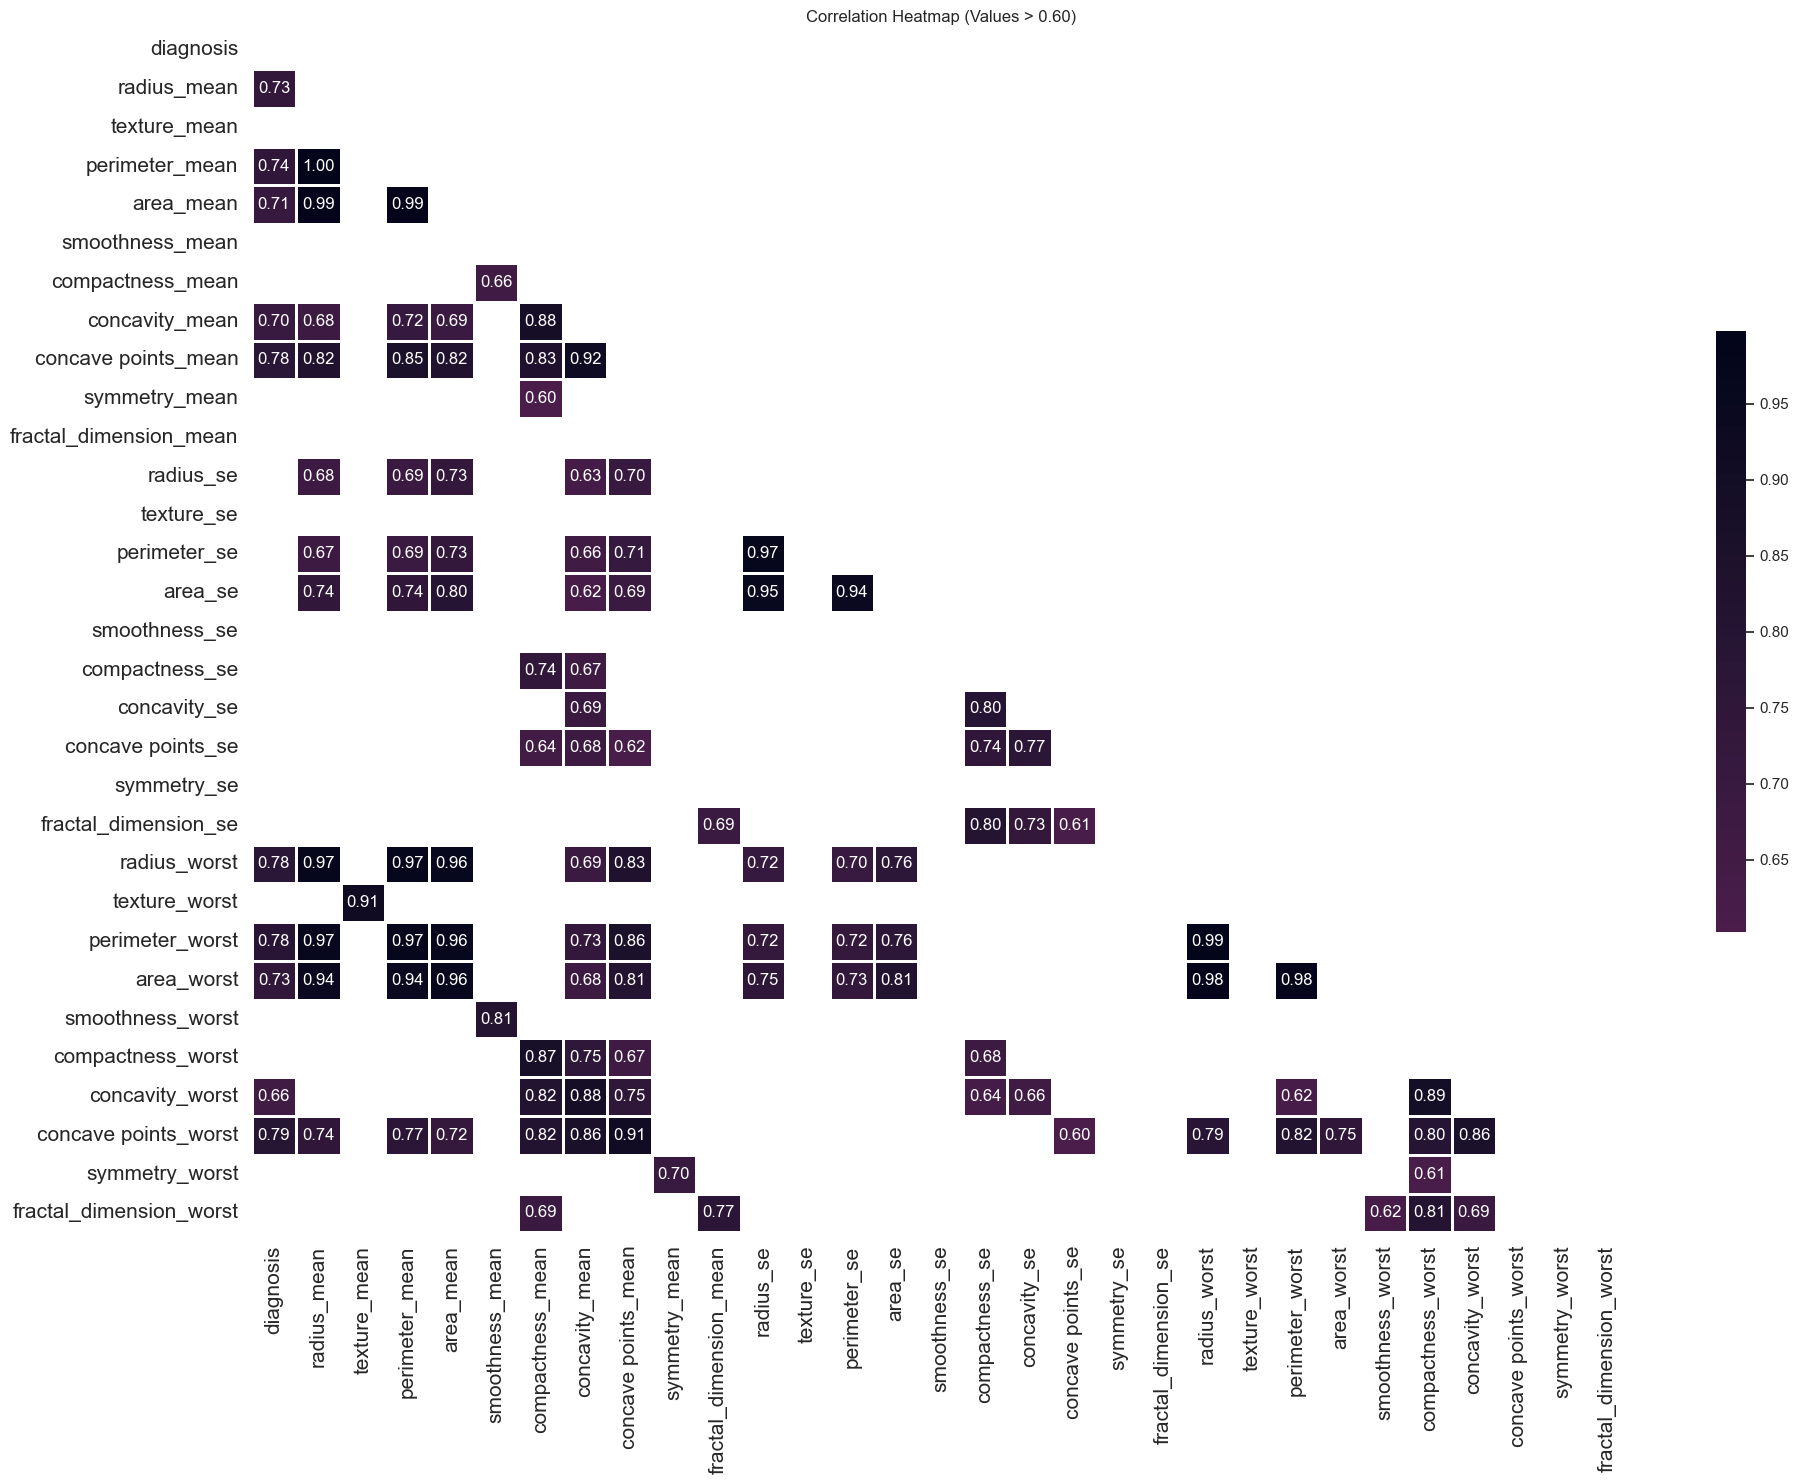

In [1205]:
data_filtered =data.select_dtypes(include="number")

corr_matrix =data_filtered.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix[corr_matrix > 0.60]

plt.figure(figsize=(20, 15))
ax = sns.heatmap(filtered_corr, annot=True, cmap='rocket_r', fmt='.2f',
                 linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)


plt.title("Correlation Heatmap (Values > 0.60)")

plt.tight_layout()
plt.show()

In [1211]:
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [1212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### Data Transformation

In [1213]:
scaler=StandardScaler()
x_train=pd.DataFrame(data=scaler.fit_transform(x_train),columns=x.columns)
x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x.columns)

In [1214]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [1215]:
def compute_cost(X,y,w,b,*argv):
    m,n=X.shape
    loss_sum=0
    for i in range(m):
        # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb=0
        for j in range(n):
            z_wb_ij=np.dot(X[i][j],w[j])
            z_wb+=z_wb_ij
        z_wb+=b
        f_wb=sigmoid(z_wb)
        epsilon = 1e-15
        f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
        loss=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
        loss_sum+=loss
    total_cost=(1/m)*loss_sum
    return total_cost


In [1216]:
def compute_gradient(X,y,w,b,*argv):
    m,n=X.shape
    # m là số example, n là số tính năng
    dj_dw=np.zeros(w.shape)
    dj_db=0
    for i in range(m):
        f_wb=sigmoid(np.dot(X[i],w)+b)
        dj_db_i=f_wb-y[i]

        dj_db+=dj_db_i

        for j in range(n):
            dj_dw_ij=(f_wb-y[i])*X[i][j]
            dj_dw[j]+=dj_dw_ij
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_db,dj_dw

In [1217]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}  ")
        
    return w_in, b_in, J_history, w_history 

In [1218]:
initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = 0
X_train=np.array(x_train)
Y_train=np.array(y_train)
w,b, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                   compute_cost,compute_gradient, 0.1, 1000,0)

Iteration    0  
Iteration  100  
Iteration  200  
Iteration  300  
Iteration  400  
Iteration  500  
Iteration  600  
Iteration  700  
Iteration  800  
Iteration  900  
Iteration  999  


In [1219]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        f_wb = sigmoid(np.dot(X[i],w)+b)
        p[i] =f_wb >= 0.5
    return p

In [1220]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



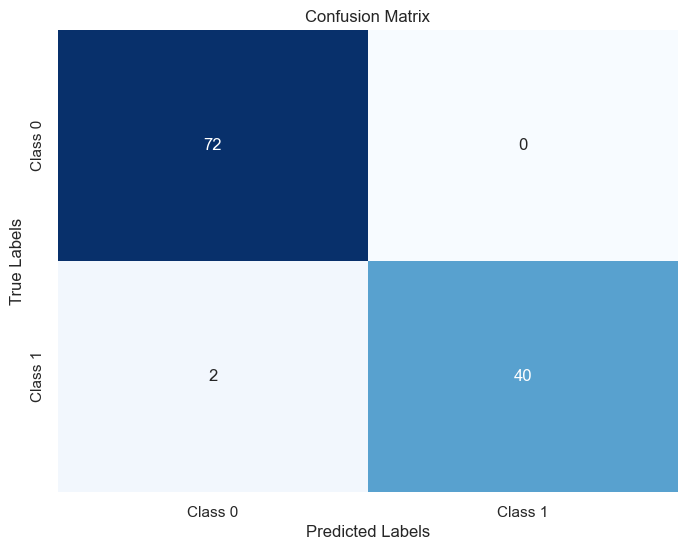

Train Accuracy: 98.245614


In [1221]:
X_test=np.array(x_test)
p = predict(X_test, w, b)
accuracy = accuracy_score(y_test, p)
conf_matrix = confusion_matrix(y_test, p)
class_report = classification_report(y_test, p)

# Hiển thị kết quả
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

In [1222]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


# Khởi tạo oversampler
oversampler = RandomOverSampler(random_state=42)
x_train, y_train = oversampler.fit_resample(x_train, y_train)

In [1223]:
from sklearn.metrics import precision_score, recall_score, f1_score


### Cost function for regularlized logistic regression

In [1224]:
def compute_cost_reg_L2(X,y,w,b,lambda_):
    m,n=X.shape
    cost_without_reg=compute_cost(X,y,w,b)
    
    reg_cost=0
    for j in range(n):
        reg_cost_j=w[j]**2
        reg_cost+=reg_cost_j
    reg_cost=(lambda_/(2*m))*reg_cost

    total_cost=cost_without_reg+reg_cost

    return total_cost

In [1225]:
def compute_cost_reg_L1(X, y, w, b, lambda_):
    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    # Tính toán regularization cost với L1
    reg_cost = 0
    for j in range(n):
        reg_cost_j = abs(w[j])  # Thay w[j]**2 thành abs(w[j]) cho L1
        reg_cost += reg_cost_j
    reg_cost = (lambda_ / m) * reg_cost  # L1 không chia cho 2 như L2
    # Tính toán tổng chi phí
    total_cost = cost_without_reg + reg_cost
    return total_cost


In [1226]:
def compute_gradient_reg_L2(X,y,w,b,lambda_=5):
    m,n=X.shape
    dj_db,dj_dw=compute_gradient(X,y,w,b)

    for j in range(n):
        dj_dw_j_reg=(lambda_/m)*w[j]
        dj_dw[j]+=dj_dw_j_reg

    return dj_db,dj_dw

In [1227]:
def compute_gradient_reg_L1(X, y, w, b, lambda_=5):
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    # Tính toán regularization cho từng thành phần của gradient với L1
    for j in range(n):
        dj_dw_j_reg = (lambda_ / m) * (1 if w[j] > 0 else -1 if w[j] < 0 else 0)
        dj_dw[j] += dj_dw_j_reg
    return dj_db, dj_dw


In [1228]:
initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = 0
X_train=np.array(x_train)
Y_train=np.array(y_train)
w_L2,b_L2, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                    compute_cost_reg_L2,compute_gradient_reg_L2, 0.8, 1000,6)

Iteration    0  
Iteration  100  
Iteration  200  
Iteration  300  
Iteration  400  
Iteration  500  
Iteration  600  
Iteration  700  
Iteration  800  
Iteration  900  
Iteration  999  


In [1229]:
initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = 0
X_train=np.array(x_train)
Y_train=np.array(y_train)
w_L1,b_L1, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                    compute_cost_reg_L1,compute_gradient_reg_L1, 0.8, 1000,0.9)

Iteration    0  
Iteration  100  
Iteration  200  
Iteration  300  
Iteration  400  
Iteration  500  
Iteration  600  
Iteration  700  
Iteration  800  
Iteration  900  
Iteration  999  


Accuracy: 0.9912
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



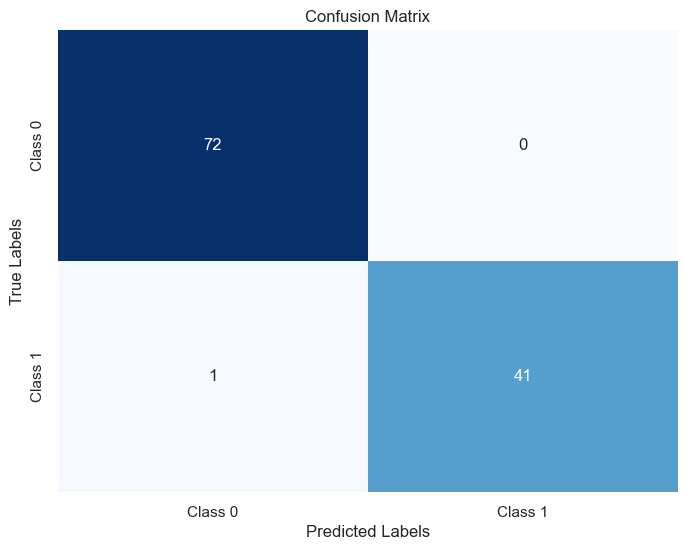

In [1230]:
X_test=np.array(x_test)
p = predict(X_test, w_L2, b_L2)
# Tính toán độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
accuracy_l2 = accuracy_score(y_test, p)
conf_matrix = confusion_matrix(y_test, p)
class_report = classification_report(y_test, p)
# Tính precision, recall, và F1 score theo từng lớp hoặc trung bình
precision_l2= precision_score(y_test, p, average='macro')
recall_l2 = recall_score(y_test, p, average='macro')
f1_l2 = f1_score(y_test, p, average='macro')

# Hiển thị kết quả
print(f"Accuracy: {accuracy_l2:.4f}")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



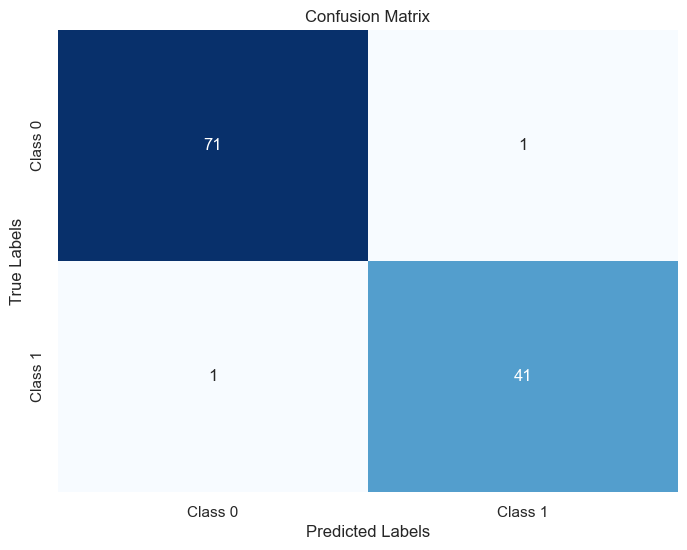

In [1231]:
X_test=np.array(x_test)
p = predict(X_test, w_L1, b_L1)
# Tính toán độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
accuracy = accuracy_score(y_test, p)
conf_matrix = confusion_matrix(y_test, p)
class_report = classification_report(y_test, p)
precision_l1= precision_score(y_test, p, average='macro')
recall_l1 = recall_score(y_test, p, average='macro')
f1_l1 = f1_score(y_test, p, average='macro')

# Hiển thị kết quả
print(f"Accuracy: {accuracy:.4f}")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

-Elastic Net kết hợp cả L1 và L2, nhờ đó có thể đạt được cả ưu điểm của Ridge và Lasso. Elastic Net rất hữu ích khi dữ liệu có số chiều cao hoặc có tính đa cộng tuyến giữa các đặc trưng.

Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\Users\HP\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


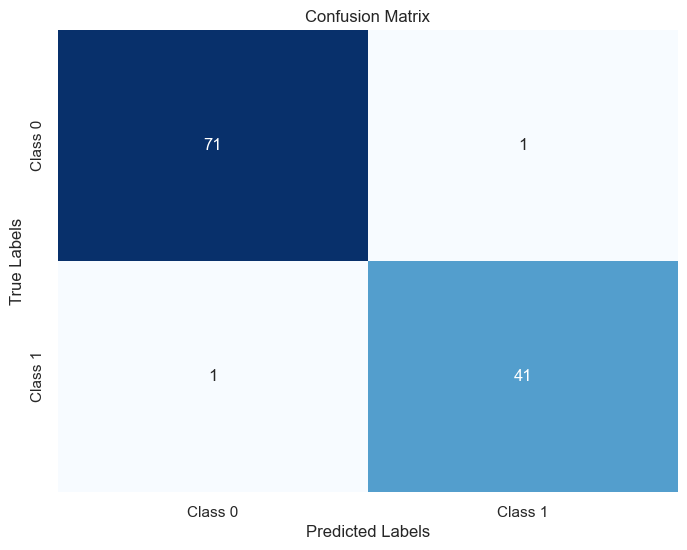

In [1232]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình hồi quy logistic với Elastic Net regularization
model = LogisticRegression(penalty='l2', solver='saga', C=1.0)
model.fit(X_train, Y_train)

# Kiểm tra độ chính xác trên tập kiểm tra
X_test=np.array(x_test)
p = model.predict(X_test)
accuracy = accuracy_score(y_test, p)
conf_matrix = confusion_matrix(y_test, p)
class_report=classification_report(y_test,p)
precision_l2_library= precision_score(y_test, p, average='macro')
recall_l2_library = recall_score(y_test, p, average='macro')
f1_l2_library = f1_score(y_test, p, average='macro')

# Hiển thị kết quả
print(f"Accuracy: {accuracy:.4f}")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### This Experience We are going to add momentum

In [1233]:
def stochastic_gradient_descent_with_momentum(X, y, w_init, b_init, alpha, num_epochs, beta,_lambda):
    m, n = X.shape
    w = w_init.copy()
    b = b_init
    v_w = np.zeros_like(w)  # Vector momentum cho trọng số
    v_b = 0  # Scalar momentum cho bias
    J_history = []

    for epoch in range(num_epochs):
        for i in range(m):
            # Tính gradient cho mẫu hiện tại
            dj_db, dj_dw = compute_gradient_reg_L2(X[i:i+1], y[i:i+1], w, b,_lambda)

            # Cập nhật momentum
            v_w = beta * v_w + (1 - beta) * dj_dw
            v_b = beta * v_b + (1 - beta) * dj_db
            
            # Cập nhật trọng số và bias
            w -= alpha * v_w
            b -= alpha * v_b
        # Tính toán chi phí cho toàn bộ tập huấn luyện tại mỗi epoch
        # cost = compute_cost_reg(X, y, w, b,0.001)
        # J_history.append(cost)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}")

    return w, b

In [1234]:
import numpy as np

def mini_batch_gradient_descent_with_momentum(X, y, w_init, b_init, alpha, num_epochs, beta, _lambda, batch_size=32):
    m, n = X.shape
    w = w_init.copy()
    b = b_init
    v_w = np.zeros_like(w)  # Momentum vector for weights
    v_b = 0  # Momentum scalar for bias
    J_history = []
    for epoch in range(num_epochs):
        # Shuffle the data at the beginning of each epoch
        seed_value = 42  # Bạn có thể chọn giá trị bất kỳ cho seed
        np.random.seed(seed_value)  # Đặt seed để tái lập ngẫu nhiên
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        # Process each mini-batch
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            # Compute gradients for the current mini-batch
            dj_db, dj_dw= compute_gradient_reg_L2(X_batch, y_batch, w, b, _lambda)
            # Update momentum
            v_w = beta * v_w + (1 - beta) * dj_dw
            v_b = beta * v_b + (1 - beta) * dj_db
            # Update weights and bias
            w -= alpha * v_w
            b -= alpha * v_b
        # Optionally calculate cost for the entire training set at each epoch
        # cost = compute_cost_reg(X, y, w, b, _lambda)
        # J_history.append(cost)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}")
    return w, b


In [1235]:
def run_logistic_regression_with_momentum(X_train, Y_train,X_test,y_test, initial_w, initial_b, lr, num_epochs, beta,_lambda=0.01):
    # Huấn luyện mô hình
    w, b = mini_batch_gradient_descent_with_momentum(X_train, Y_train, initial_w, initial_b, lr, num_epochs, beta,_lambda)
    # Dự đoán
    Y_pred = predict(X_test,w,b)
    # Tính toán độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
    accuracy = accuracy_score(y_test, Y_pred)
    conf_matrix = confusion_matrix(y_test, Y_pred)
    class_report = classification_report(y_test, Y_pred)
    precision_l2_momentum= precision_score(y_test, Y_pred, average='macro')
    recall_l2_momentum = recall_score(y_test, Y_pred, average='macro')
    f1_l2_momentum = f1_score(y_test, Y_pred, average='macro')

    # Hiển thị kết quả
    print(f"Accuracy: {accuracy:.4f}")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    print("Classification Report:\n", class_report)
    return precision_l2_momentum,recall_l2_momentum,f1_l2_momentum

In [1236]:
def run_logistic_regression_with_momentum_sto(X_train, Y_train,X_test,y_test, initial_w, initial_b, lr, num_epochs, beta,_lambda=0.01):
    # Huấn luyện mô hình
    w, b = stochastic_gradient_descent_with_momentum(X_train, Y_train, initial_w, initial_b, lr, num_epochs, beta,_lambda)
    # Dự đoán
    Y_pred = predict(X_test,w,b)
    # Tính toán độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
    accuracy = accuracy_score(y_test, Y_pred)
    conf_matrix = confusion_matrix(y_test, Y_pred)
    class_report = classification_report(y_test, Y_pred)
    precision_l2_momentum_sto= precision_score(y_test, Y_pred, average='macro')
    recall_l2_momentum_sto = recall_score(y_test, Y_pred, average='macro')
    f1_l2_momentum_sto = f1_score(y_test, Y_pred, average='macro')

    # Hiển thị kết quả
    print(f"Accuracy: {accuracy:.4f}")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    print("Classification Report:\n", class_report)
    return precision_l2_momentum_sto,recall_l2_momentum_sto,f1_l2_momentum_sto

In [1237]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def run_logistic_regression_with_momentum_cv(X, y, initial_w, initial_b, lr, num_epochs, beta, num_folds=5,_lambda=0.001):
    # Khởi tạo k-fold cross-validation
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    accuracies = []
    conf_matrices = []
    reports = []
    precision_l2_momentum_cvs=[]
    recall_l2_momentum_cvs=[]
    f1_l2_momentum_cvs=[]
    fold = 1
    for train_index, test_index in kf.split(X, y):
        # Tách dữ liệu huấn luyện và kiểm tra cho từng fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Huấn luyện mô hình
        w, b = mini_batch_gradient_descent_with_momentum(X_train, y_train, initial_w, initial_b, lr, num_epochs, beta,_lambda)
        final_w, final_b = w, b
        
        # Dự đoán
        Y_pred = predict(X_test, w, b)
        # Tính toán các chỉ số đánh giá
        accuracy = accuracy_score(y_test, Y_pred)
        accuracies.append(accuracy)
        conf_matrix = confusion_matrix(y_test, Y_pred)
        conf_matrices.append(conf_matrix)
        precision_l2_momentum_cv= precision_score(y_test, Y_pred, average='macro')
        precision_l2_momentum_cvs.append(precision_l2_momentum_cv)
        recall_l2_momentum_cv = recall_score(y_test, Y_pred, average='macro')
        recall_l2_momentum_cvs.append(recall_l2_momentum_cv)
        f1_l2_momentum_cv = f1_score(y_test, Y_pred, average='macro')
        f1_l2_momentum_cvs.append(f1_l2_momentum_cv)
        # Lấy classification report dưới dạng từ điển, với output_dict=True
        report = classification_report(y_test, Y_pred, output_dict=True)
        # Đảm bảo mỗi nhãn có đầy đủ metric, nếu không sẽ thêm các giá trị mặc định
        for label in ['0', '1', 'accuracy', 'macro avg', 'weighted avg']:
            if label not in report:
                report[label] = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}
        reports.append(report)
        print(f"Fold {fold}: Accuracy = {accuracy:.4f}")
        fold += 1
    # Tính trung bình độ chính xác
    mean_accuracy = np.mean(accuracies)
    print(f"\nMean Accuracy: {mean_accuracy:.4f}")
    mean_recall=np.mean(precision_l2_momentum_cvs)
    mean_f1=np.mean(f1_l2_momentum_cvs)
    mean_precision=np.mean(precision_l2_momentum_cvs)
    # Tính trung bình ma trận nhầm lẫn
    avg_conf_matrix = np.mean(conf_matrices, axis=0)
    # Tính trung bình của classification report
    avg_report = {}
    for label in reports[0].keys():
        avg_report[label] = {}
        if(label!='accuracy'):
            for metric in reports[0][label]:
                if metric == "support":
                    # Với 'support', tính tổng
                    avg_report[label][metric] = sum(report[label][metric] for report in reports)
                else:
                    # Tính trung bình cho precision, recall và f1-score
                    avg_report[label][metric] = np.mean([report[label][metric] for report in reports])
        else:
                avg_report[label][metric]=reports[0]['accuracy']
    report_df = pd.DataFrame(avg_report).transpose()
    # In bảng classification report
    print("\nAverage Classification Report:")
    display(report_df)
    # Hiển thị ma trận nhầm lẫn trung bình
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title('Average Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return mean_recall,mean_f1,mean_precision


#### First Experience

lr = 0.01 
epoch = 500
beta = 0 

Epoch 0
Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Accuracy: 0.9912


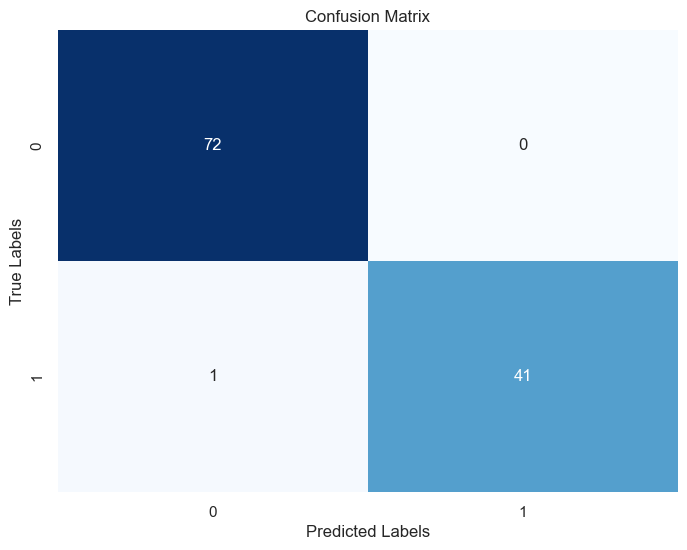

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [1255]:

initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = 0
lr = 0.01
num_epochs = 100  # Số epoch
beta = 0.1  # Hệ số momentum
# Chạy SGD với momentum
X_test=np.array(x_test)
precision_l2_momentum,recall_l2_momentum,f1_l2_momentum=run_logistic_regression_with_momentum(X_train, Y_train,X_test,y_test, initial_w, initial_b, lr, num_epochs, beta,0.1)


Epoch 0
Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Accuracy: 0.9825


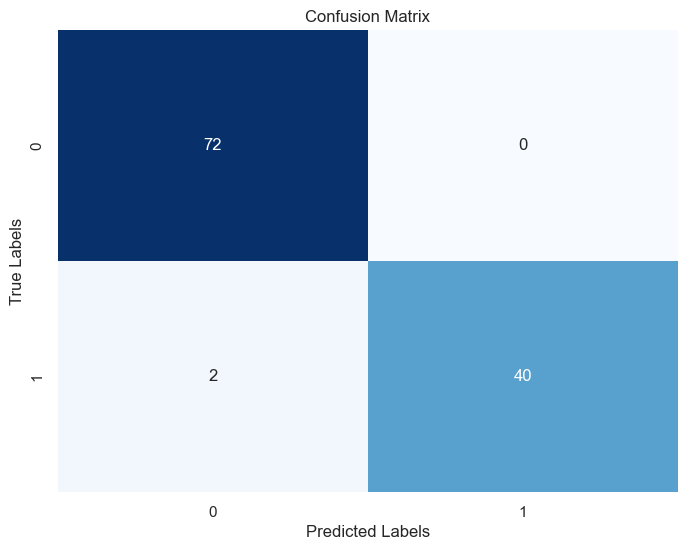

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1239]:
initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = 0
lr = 0.01
num_epochs = 100  # Số epoch
beta = 0.9  # Hệ số momentum
# Chạy SGD với momentum
X_test=np.array(x_test)
precision_l2_momentum_sto,recall_l2_momentum_sto,f1_l2_momentum_sto=run_logistic_regression_with_momentum_sto(X_train, Y_train,X_test,y_test, initial_w, initial_b, lr, num_epochs, beta,0.1)

C:\Users\HP\AppData\Local\Temp\ipykernel_27208\1475003753.py:2: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))


Epoch 0
Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Fold 1: Accuracy = 0.9211
Epoch 0


C:\Users\HP\AppData\Local\Temp\ipykernel_27208\1475003753.py:2: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))


Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Fold 2: Accuracy = 0.8947
Epoch 0


C:\Users\HP\AppData\Local\Temp\ipykernel_27208\1475003753.py:2: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))


Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Fold 3: Accuracy = 0.8947
Epoch 0


C:\Users\HP\AppData\Local\Temp\ipykernel_27208\1475003753.py:2: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))


Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Fold 4: Accuracy = 0.9737
Epoch 0


C:\Users\HP\AppData\Local\Temp\ipykernel_27208\1475003753.py:2: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))


Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Fold 5: Accuracy = 0.9558

Mean Accuracy: 0.9280

Average Classification Report:


,precision,recall,f1-score,support
0,0.914798,0.977621,0.944789,357.000000
1,0.957763,0.844961,0.896399,212.000000
accuracy,NaN,NaN,NaN,0.921053
macro avg,0.936280,0.911291,0.920594,569.000000
weighted avg,0.930941,0.927993,0.926714,569.000000


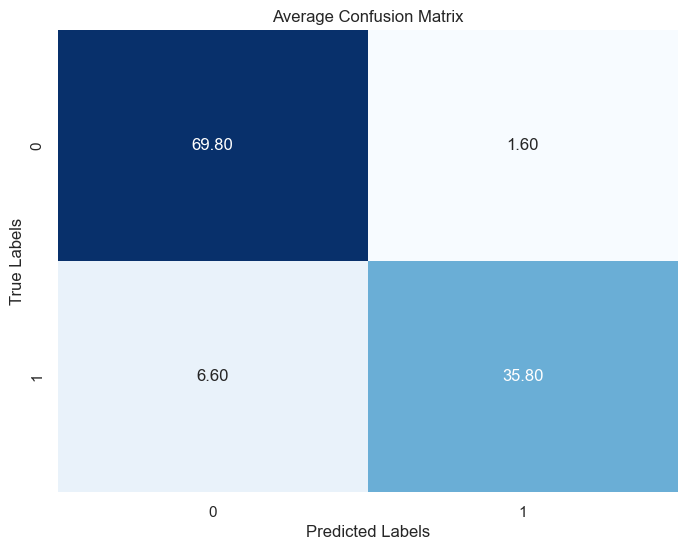

In [1257]:

initial_w = 0.01 * (np.random.rand(30) - 0.5)
initial_b = 0
lr = 0.01
num_epochs = 100  # Số epoch
beta = 0.9 # Hệ số momentum
# Chạy SGD với momentum
X_test=np.array(x_test)
X=np.array(x)
Y=np.array(y)
mean_recall,mean_f1,mean_precision=run_logistic_regression_with_momentum_cv(X, Y,initial_w,initial_b, lr, num_epochs, beta,num_folds=5,_lambda=0.1)

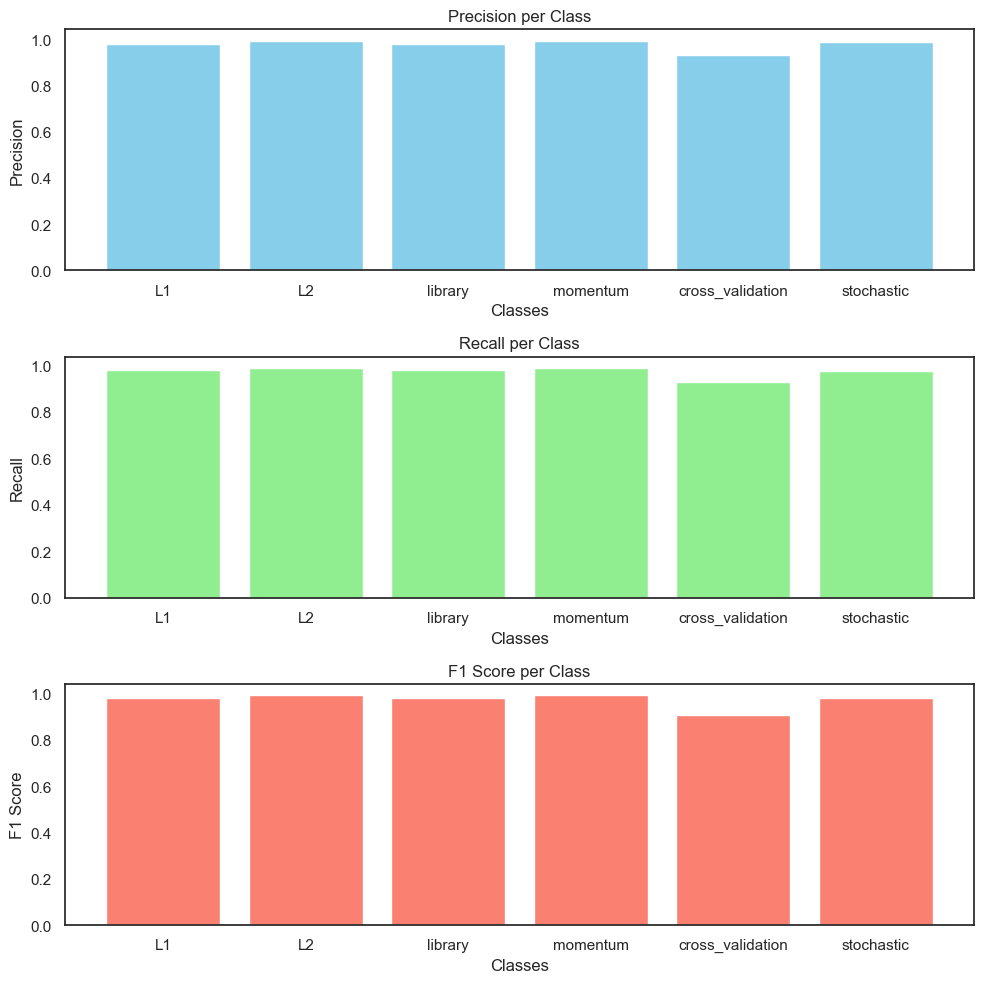

In [1254]:
precision = [precision_l1, precision_l2, precision_l2_library,precision_l2_momentum,mean_precision,precision_l2_momentum_sto]
recall = [recall_l1, recall_l2, recall_l2_library,recall_l2_momentum,mean_recall,recall_l2_momentum_sto]
f1_score_list = [f1_l1, f1_l2, f1_l2_library,f1_l2_momentum,mean_f1,f1_l2_momentum_sto]
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
classes = ['L1', 'L2', 'library','momentum','cross_validation','stochastic']
# Biểu đồ cột cho Precision
ax[0].bar(classes, precision, color='skyblue')
ax[0].set_title('Precision per Class')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Precision')

# Biểu đồ cột cho Recall
ax[1].bar(classes, recall, color='lightgreen')
ax[1].set_title('Recall per Class')
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Recall')

# Biểu đồ cột cho F1 Score
ax[2].bar(classes, f1_score_list, color='salmon')
ax[2].set_title('F1 Score per Class')
ax[2].set_xlabel('Classes')
ax[2].set_ylabel('F1 Score')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Sử dụng KNN

# Lý giải lý do vì sao Grid Search và Random Search cho ra giá trị k khác nhau
- Grid Search thử tất cả các giá trị trong một dải xác định (param_grid), chẳng hạn từ 1 đến 10 cho k. Nó sẽ tìm kiếm toàn bộ các tổ hợp để đảm bảo không bỏ sót bất kỳ giá trị nào.
- Vì thử toàn bộ, Grid Search có thể tìm được giá trị k chính xác nhất (trong dải giá trị được cung cấp) dựa trên hiệu suất của mô hình, nhưng quá trình này có thể tốn nhiều tài nguyên nếu dải giá trị quá lớn.

- Random Search chọn ngẫu nhiên một số lượng giá trị trong dải rộng hơn (chẳng hạn, từ 1 đến 20) trong số các tổ hợp tham số. Số lần thử nghiệm (nghĩa là các giá trị n_iter) thường ít hơn so với Grid Search.
- Vì các giá trị k được chọn ngẫu nhiên, Random Search có thể khám phá nhiều giá trị nằm ngoài phạm vi Grid Search, nhưng nó cũng có thể bỏ qua một số giá trị tiềm năng vì không thử hết toàn bộ dải giá trị.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Khởi tạo và chọn giá trị k tối ưu

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Sử dụng Grid Search để tìm k tối ưu
param_grid = {'n_neighbors': range(1, 20)}  # Dải giá trị k cần thử nghiệm
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Xem k tối ưu tìm được và hiệu suất trên tập test
best_k_grid = grid_search.best_params_['n_neighbors']
best_knn_grid = grid_search.best_estimator_

# Tính toán độ chính xác trên tập test
y_pred_grid = best_knn_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
confusion_mat_grid = confusion_matrix(y_test, y_pred_grid)
print("Confusion Matrix:\n", confusion_mat_grid)

print(f"Best k from Grid Search: {best_k_grid}")
print(f"Accuracy with best k from Grid Search: {accuracy_grid}")
print("Classification Report:\n", classification_report(y_test, y_pred_grid))

# Sử dụng Random Search để tìm k tối ưu
param_dist = {'n_neighbors': range(1, 50)}  # Khoảng rộng hơn cho Random Search
random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Kết quả k từ Random Search
best_k_random = random_search.best_params_['n_neighbors']
best_knn_random = random_search.best_estimator_

# Tính toán độ chính xác trên tập test
y_pred_random = best_knn_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
confusion_mat_random = confusion_matrix(y_test, y_pred_random)
print("Confusion Matrix:\n", confusion_mat_random)

print(f"Best k from Random Search: {best_k_random}")
print(f"Accuracy with best k from Random Search: {accuracy_random}")
print("Classification Report:\n", classification_report(y_test, y_pred_random))


Confusion Matrix:
 [[71  1]
 [ 5 37]]
Best k from Grid Search: 3
Accuracy with best k from Grid Search: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[71  1]
 [ 5 37]]
Best k from Random Search: 14
Accuracy with best k from Random Search: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# Sử dụng Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy and display evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)

print("Confusion Matrix:\n", confusion_mat_rf)

print("Classification Report:\n", classification_rep_rf)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[71  1]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

